## Explorando os dados

### Entendendo o conjunto de dados

In [97]:
import pandas as pd

In [98]:
dados = pd.read_csv('flights.csv')
dados.head()

flight_id airline aircraft_type      schengen origin  arrival_time  \
0         26      MM   Airbus A320  non-schengen    TCY      8.885071   
1         10      YE   Airbus A320  non-schengen    TCY      8.939996   
2          3      BZ  Embraer E175      schengen    TZF     18.635384   
3         28      BZ   Airbus A330  non-schengen    EMM     15.967963   
4         15      BZ   Airbus A330  non-schengen    FJB     16.571894   

   departure_time  day  year  is_holiday      delay  
0       10.885071    0  2010       False  70.205981  
1       11.939996    0  2010       False  38.484609  
2       22.635384    0  2010       False   2.388305  
3       17.967963    0  2010       False  19.138491  
4       19.571894    0  2010       False  15.016271

In [99]:
dados.tail()

flight_id airline aircraft_type      schengen origin  arrival_time  \
71170          3      BZ  Embraer E175      schengen    TZF     18.635384   
71171         17      BZ   Airbus A330  non-schengen    CNU     16.718722   
71172          7      MM    Boeing 787      schengen    TZF      8.564949   
71173          5      BZ   Airbus A320      schengen    ZQO      9.344097   
71174         29      BZ    Boeing 737      schengen    ZQO      8.591208   

       departure_time  day  year  is_holiday      delay  
71170       22.635384  364  2022        True  25.677277  
71171       21.718722  364  2022        True  52.624348  
71172       13.564949  364  2022        True  56.167080  
71173       12.344097  364  2022        True  56.758844  
71174       11.591208  364  2022        True  41.401648

In [100]:
dados.shape

(71175, 11)

In [101]:
dados.describe()

flight_id  arrival_time  departure_time           day          year  \
count  71175.000000  71175.000000    71175.000000  71175.000000  71175.000000   
mean      15.465135     13.283159       16.480222    182.000000   2016.000000   
std        8.649646      4.023380        4.143705    105.366769      3.741684   
min        1.000000      7.065594       10.065594      0.000000   2010.000000   
25%        8.000000      8.939996       12.668655     91.000000   2013.000000   
50%       15.000000     14.258911       16.376052    182.000000   2016.000000   
75%       23.000000     16.909690       20.041281    273.000000   2019.000000   
max       30.000000     19.341235       23.341235    364.000000   2022.000000   

              delay  
count  71175.000000  
mean      12.548378  
std       23.125349  
min      -41.028033  
25%       -4.412876  
50%        9.740454  
75%       27.650853  
max      125.632352

In [102]:
dados.describe(include='O')

airline aircraft_type  schengen origin
count    71175         71175     71175  71175
unique       3             6         2     10
top         BZ   Airbus A320  schengen    TZF
freq     47598         30778     42569  14162

In [103]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


### Visualiza√ß√µes gr√°ficas dos dados

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

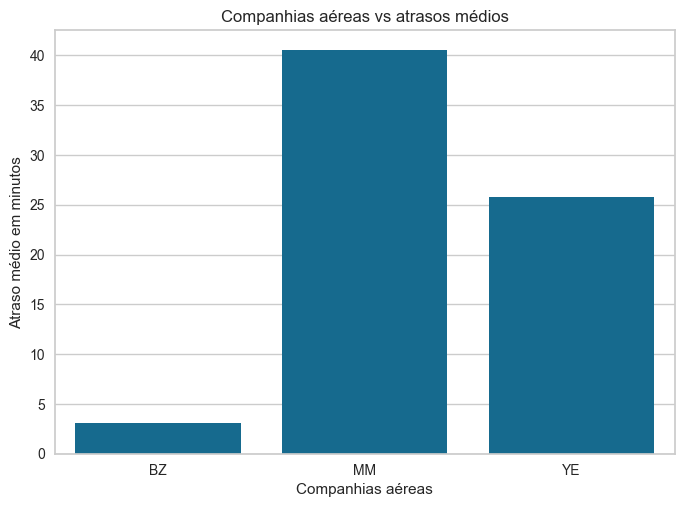

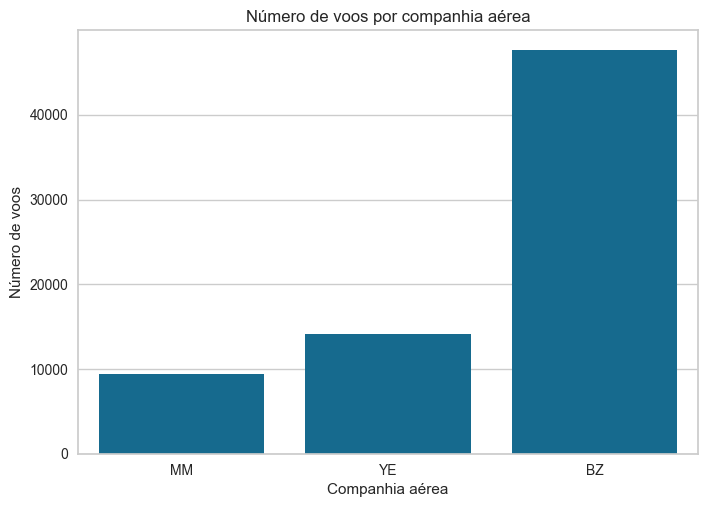

In [105]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias a√©reas vs atrasos m√©dios')
plt.xlabel('Companhias a√©reas')
plt.ylabel('Atraso m√©dio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('N√∫mero de voos por companhia a√©rea')
plt.xlabel('Companhia a√©rea')
plt.ylabel('N√∫mero de voos')
plt.show()

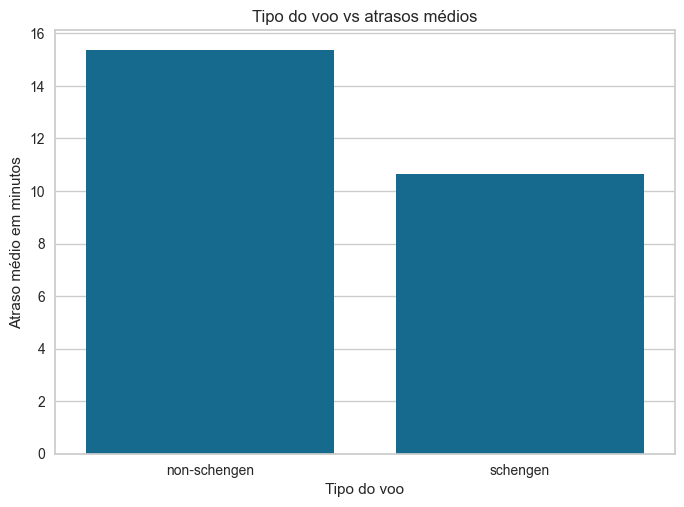

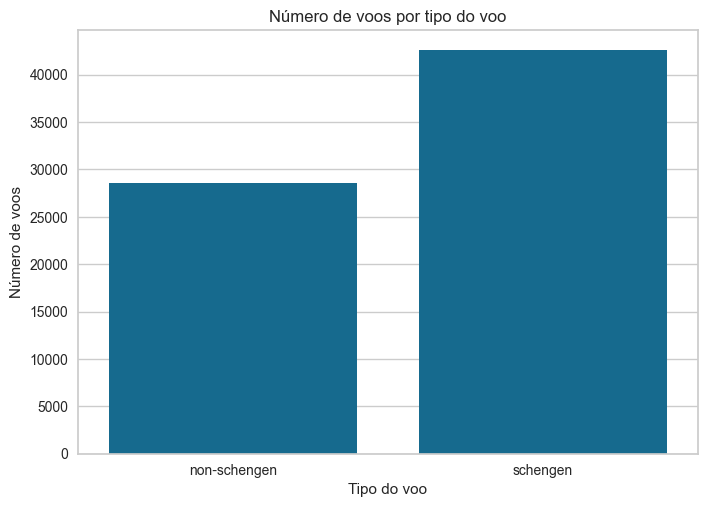

In [106]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos m√©dios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso m√©dio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('N√∫mero de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('N√∫mero de voos')
plt.show()

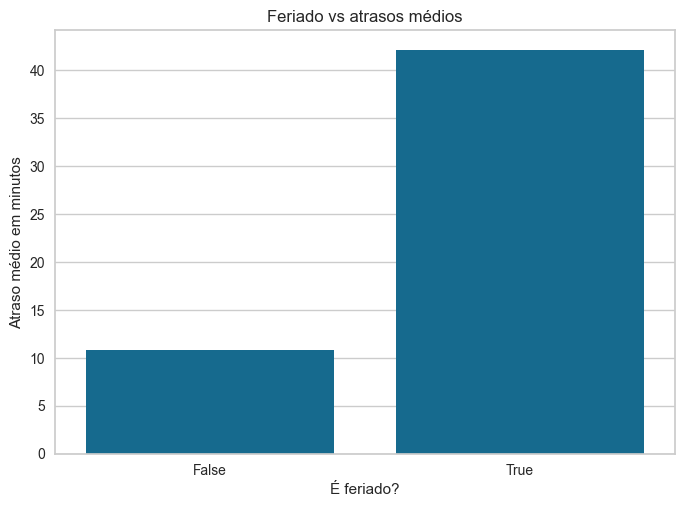

In [107]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos m√©dios')
plt.xlabel('√â feriado?')
plt.ylabel('Atraso m√©dio em minutos')
plt.show()

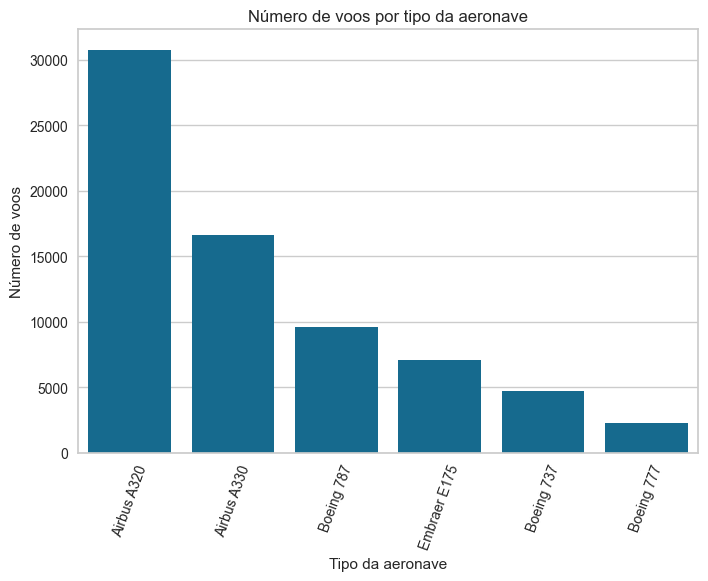

In [108]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('N√∫mero de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('N√∫mero de voos')
plt.show()

### Analisando a distribui√ß√£o dos dados

In [109]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

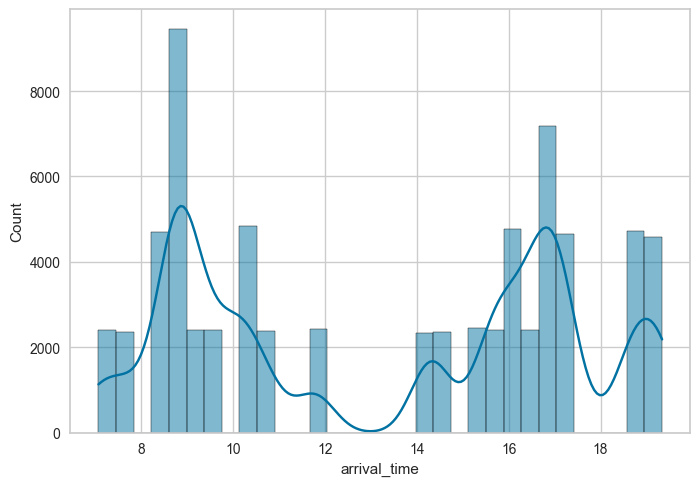

In [110]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

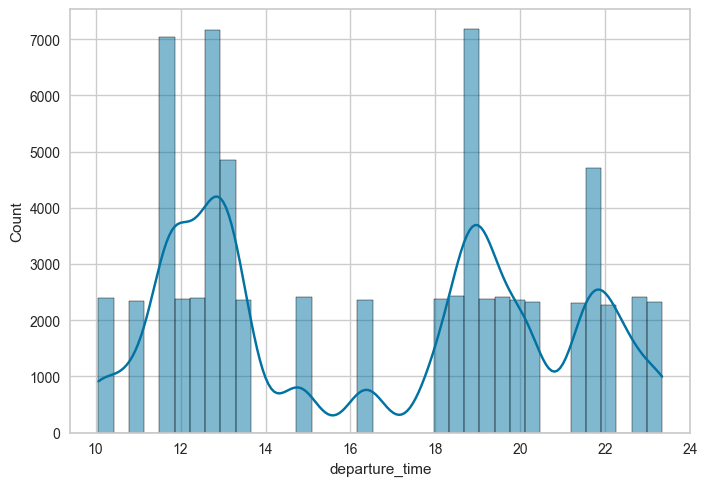

In [111]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

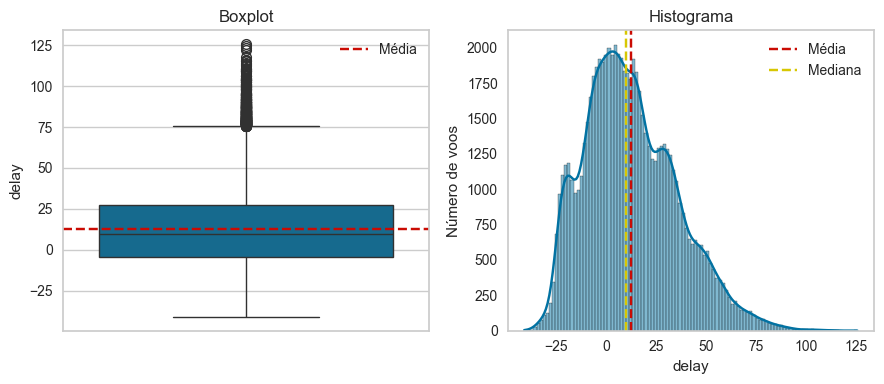

In [112]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='M√©dia')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('N√∫mero de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='M√©dia')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## Feature engineering

In [113]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

flight_id airline aircraft_type      schengen origin  arrival_time  \
0         26      MM   Airbus A320  non-schengen    TCY      8.885071   
1         10      YE   Airbus A320  non-schengen    TCY      8.939996   
2          3      BZ  Embraer E175      schengen    TZF     18.635384   
3         28      BZ   Airbus A330  non-schengen    EMM     15.967963   
4         15      BZ   Airbus A330  non-schengen    FJB     16.571894   

   departure_time  day  year  is_holiday      delay       date  
0       10.885071    0  2010       False  70.205981 2010-01-01  
1       11.939996    0  2010       False  38.484609 2010-01-01  
2       22.635384    0  2010       False   2.388305 2010-01-01  
3       17.967963    0  2010       False  19.138491 2010-01-01  
4       19.571894    0  2010       False  15.016271 2010-01-01

In [114]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

flight_id airline aircraft_type      schengen origin  arrival_time  \
0         26      MM   Airbus A320  non-schengen    TCY      8.885071   
1         10      YE   Airbus A320  non-schengen    TCY      8.939996   
2          3      BZ  Embraer E175      schengen    TZF     18.635384   
3         28      BZ   Airbus A330  non-schengen    EMM     15.967963   
4         15      BZ   Airbus A330  non-schengen    FJB     16.571894   

   departure_time  day  year  is_holiday      delay       date  is_weekend  
0       10.885071    0  2010       False  70.205981 2010-01-01       False  
1       11.939996    0  2010       False  38.484609 2010-01-01       False  
2       22.635384    0  2010       False   2.388305 2010-01-01       False  
3       17.967963    0  2010       False  19.138491 2010-01-01       False  
4       19.571894    0  2010       False  15.016271 2010-01-01       False

In [115]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

flight_id airline aircraft_type      schengen origin  arrival_time  \
0         26      MM   Airbus A320  non-schengen    TCY      8.885071   
1         10      YE   Airbus A320  non-schengen    TCY      8.939996   
2          3      BZ  Embraer E175      schengen    TZF     18.635384   
3         28      BZ   Airbus A330  non-schengen    EMM     15.967963   
4         15      BZ   Airbus A330  non-schengen    FJB     16.571894   

   departure_time  day  year  is_holiday      delay       date  is_weekend  \
0       10.885071    0  2010       False  70.205981 2010-01-01       False   
1       11.939996    0  2010       False  38.484609 2010-01-01       False   
2       22.635384    0  2010       False   2.388305 2010-01-01       False   
3       17.967963    0  2010       False  19.138491 2010-01-01       False   
4       19.571894    0  2010       False  15.016271 2010-01-01       False   

  day_name  
0   Friday  
1   Friday  
2   Friday  
3   Friday  
4   Friday

### Feature Encoding

In [116]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [117]:
dados['is_holiday'].unique()

array([False,  True])

In [118]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
C:\Users\msred\AppData\Local\Temp\ipykernel_7952\2385380026.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

flight_id airline aircraft_type  schengen origin  arrival_time  \
0         26      MM   Airbus A320         0    TCY      8.885071   
1         10      YE   Airbus A320         0    TCY      8.939996   
2          3      BZ  Embraer E175         1    TZF     18.635384   
3         28      BZ   Airbus A330         0    EMM     15.967963   
4         15      BZ   Airbus A330         0    FJB     16.571894   

   departure_time  day  year  is_holiday      delay       date  is_weekend  \
0       10.885071    0  2010           0  70.205981 2010-01-01           0   
1       11.939996    0  2010           0  38.484609 2010-01-01           0   
2       22.635384    0  2010           0   2.388305 2010-01-01           0   
3       17.967963    0  2010           0  19.138491 2010-01-01           0   
4       19.571894    0  2010           0  15.016271 2010-01-01           0   

  day_name  
0   Friday  
1   Friday  
2   Friday  
3   Friday  
4   Friday

In [119]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [120]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

flight_id  schengen  arrival_time  departure_time  day  year  is_holiday  \
0         26         0      8.885071       10.885071    0  2010           0   
1         10         0      8.939996       11.939996    0  2010           0   
2          3         1     18.635384       22.635384    0  2010           0   
3         28         0     15.967963       17.967963    0  2010           0   
4         15         0     16.571894       19.571894    0  2010           0   

       delay       date  is_weekend  ...  origin_TCY  origin_TZF  origin_ZQO  \
0  70.205981 2010-01-01           0  ...           1           0           0   
1  38.484609 2010-01-01           0  ...           1           0           0   
2   2.388305 2010-01-01           0  ...           0           1           0   
3  19.138491 2010-01-01           0  ...           0           0           0   
4  15.016271 2010-01-01           0  ...           0           0           0   

   day_name_Friday  day_name_Monday  day_name_Saturday  day_name_Sunday  \
0                1                0                  0                0   
1                1                0                  0                0   
2                1                0                  0                0   
3                1                0                  0                0   
4                1                0                  0                0   

   day_name_Thursday  day_name_Tuesday  day_name_Wednesday  
0                  0                 0                   0  
1                  0                 0                   0  
2                  0                 0                   0  
3                  0                 0                   0  
4                  0                 0                   0  

[5 rows x 36 columns]

### Limpando os Dados

In [121]:
df_encoded[['arrival_time', 'departure_time']].corr()

arrival_time  departure_time
arrival_time        1.000000        0.973797
departure_time      0.973797        1.000000

In [122]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

schengen  arrival_time  is_holiday      delay  is_weekend  airline_BZ  \
0         0      8.885071           0  70.205981           0           0   
1         0      8.939996           0  38.484609           0           0   
2         1     18.635384           0   2.388305           0           1   
3         0     15.967963           0  19.138491           0           1   
4         0     16.571894           0  15.016271           0           1   

   airline_MM  airline_YE  aircraft_type_Airbus A320  \
0           1           0                          1   
1           0           1                          1   
2           0           0                          0   
3           0           0                          0   
4           0           0                          0   

   aircraft_type_Airbus A330  ...  origin_TCY  origin_TZF  origin_ZQO  \
0                          0  ...           1           0           0   
1                          0  ...           1           0           0   
2                          0  ...           0           1           0   
3                          1  ...           0           0           0   
4                          1  ...           0           0           0   

   day_name_Friday  day_name_Monday  day_name_Saturday  day_name_Sunday  \
0                1                0                  0                0   
1                1                0                  0                0   
2                1                0                  0                0   
3                1                0                  0                0   
4                1                0                  0                0   

   day_name_Thursday  day_name_Tuesday  day_name_Wednesday  
0                  0                 0                   0  
1                  0                 0                   0  
2                  0                 0                   0  
3                  0                 0                   0  
4                  0                 0                   0  

[5 rows x 31 columns]

In [123]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados)
dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())
dados

onehotencoder__airline_BZ onehotencoder__airline_MM  \
0                           0.0                       1.0   
1                           0.0                       0.0   
2                           1.0                       0.0   
3                           1.0                       0.0   
4                           1.0                       0.0   
...                         ...                       ...   
71170                       1.0                       0.0   
71171                       1.0                       0.0   
71172                       0.0                       1.0   
71173                       1.0                       0.0   
71174                       1.0                       0.0   

      onehotencoder__airline_YE onehotencoder__aircraft_type_Airbus A320  \
0                           0.0                                      1.0   
1                           1.0                                      1.0   
2                           0.0                                      0.0   
3                           0.0                                      0.0   
4                           0.0                                      0.0   
...                         ...                                      ...   
71170                       0.0                                      0.0   
71171                       0.0                                      0.0   
71172                       0.0                                      0.0   
71173                       0.0                                      1.0   
71174                       0.0                                      0.0   

      onehotencoder__aircraft_type_Airbus A330  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          1.0   
4                                          1.0   
...                                        ...   
71170                                      0.0   
71171                                      1.0   
71172                                      0.0   
71173                                      0.0   
71174                                      0.0   

      onehotencoder__aircraft_type_Boeing 737  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
71170                                     0.0   
71171                                     0.0   
71172                                     0.0   
71173                                     0.0   
71174                                     1.0   

      onehotencoder__aircraft_type_Boeing 777  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
71170                                     0.0   
71171                                     0.0   
71172                                     0.0   
71173                                     0.0   
71174                                     0.0   

      onehotencoder__aircraft_type_Boeing 787  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
71170                                     0.0   
71171                                     0.0   
71172                                     1.0   
71173                                     0.0   
71174                                     

## Sele√ß√£o e valida√ß√£o do modelo

### Treinamento do DummyRegressor

In [124]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [126]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [127]:
y_pred_dummy = model_dummy.predict(X_test)

In [128]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

def calcular_metricas_regressao(y_test, y_pred):

    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadr√°tico M√©dio': round(rmse, 4),
        'Erro Absoluto M√©dio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas


In [129]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadr√°tico M√©dio': 23.2241,
 'Erro Absoluto M√©dio': 18.6127,
 'R2 Score': -0.0}

In [130]:
from sklearn.dummy import DummyRegressor

estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(X_train, y_train)

    y_pred_dummy = model_dummy.predict(X_test)

    metricas = calcular_metricas_regressao(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrat√©gia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrat√©gia: mean
Raiz do Erro Quadr√°tico M√©dio: 23.2241
Erro Absoluto M√©dio: 18.6127
R2 Score: -0.0


Estrat√©gia: median
Raiz do Erro Quadr√°tico M√©dio: 23.4038
Erro Absoluto M√©dio: 18.4891
R2 Score: -0.0155


Estrat√©gia: quantile
Raiz do Erro Quadr√°tico M√©dio: 28.7943
Erro Absoluto M√©dio: 22.0382
R2 Score: -0.5372


Estrat√©gia: constant
Raiz do Erro Quadr√°tico M√©dio: 23.3699
Erro Absoluto M√©dio: 18.4893
R2 Score: -0.0126




### Treinamento do RandomForestRegressor

In [131]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadr√°tico M√©dio': 13.7301,
 'Erro Absoluto M√©dio': 11.0138,
 'R2 Score': 0.6505}

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


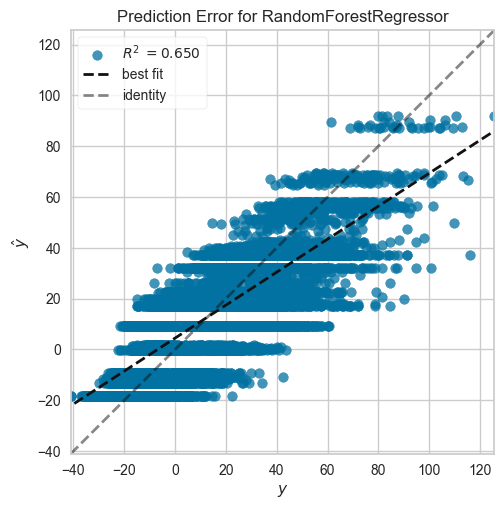

In [132]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


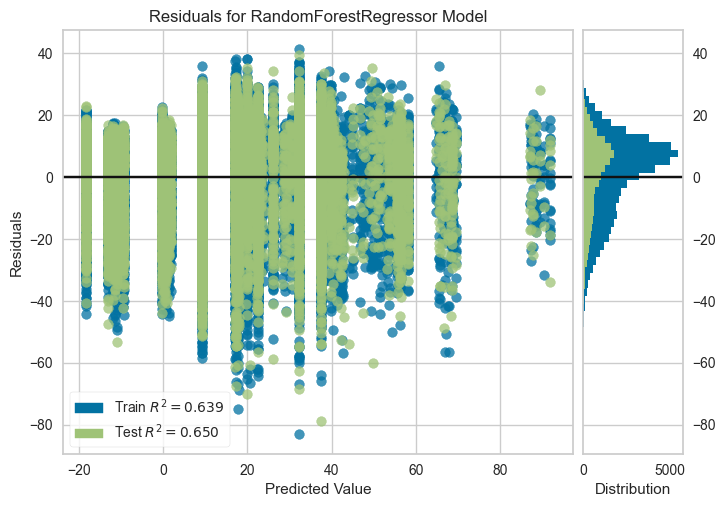

In [133]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

### Valida√ß√£o cruzada

In [134]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([2.99689102, 3.41587448, 2.88187981, 2.79335451, 2.71858239]),
 'score_time': array([0.06683278, 0.07202506, 0.05606699, 0.05740833, 0.04806471]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [135]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} M√©dia: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE M√©dia: -11.151, Std: 0.088
----------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE M√©dia: -13.883, Std: 0.101
----------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 M√©dia: 0.638, Std: 0.008
----------------------------------------------------------------


## Otimiza√ß√£o de hiperpar√¢metros

### Sele√ß√£o de recursos

c:\Users\msred\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


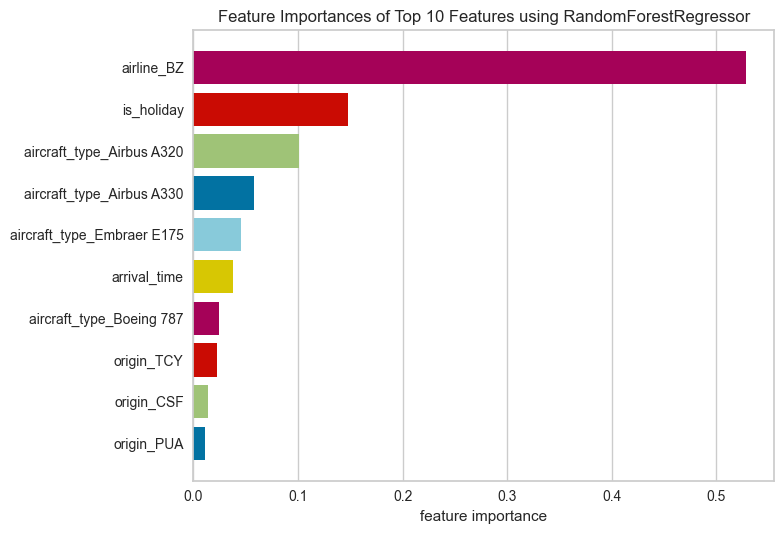

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [136]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [137]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

Features  Importances
4                   airline_BZ     0.528604
2                   is_holiday     0.147833
7    aircraft_type_Airbus A320     0.100719
8    aircraft_type_Airbus A330     0.058221
12  aircraft_type_Embraer E175     0.045619
1                 arrival_time     0.037614
11    aircraft_type_Boeing 787     0.024663
20                  origin_TCY     0.022120
15                  origin_CSF     0.013979
19                  origin_PUA     0.011385
21                  origin_TZF     0.005970
23             day_name_Friday     0.000855
18                  origin_MWL     0.000707
9     aircraft_type_Boeing 737     0.000470
22                  origin_ZQO     0.000235
14                  origin_CNU     0.000191
13                  origin_AUZ     0.000166
28            day_name_Tuesday     0.000129
24             day_name_Monday     0.000114
10    aircraft_type_Boeing 777     0.000084
17                  origin_FJB     0.000062
3                   is_weekend     0.000055
29          day_name_Wednesday     0.000054
26             day_name_Sunday     0.000042
27           day_name_Thursday     0.000033
6                   airline_YE     0.000025
25           day_name_Saturday     0.000023
5                   airline_MM     0.000016
16                  origin_EMM     0.000012
0                     schengen     0.000001

In [138]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

1        5        10       15       20       25       30
RMSE  23.0970  14.9389  14.3002  13.7406  13.7387  13.7284  13.7301
MAE   18.5637  12.0211  11.4904  11.0253  11.0242  11.0127  11.0138
R2     0.0109   0.5862   0.6208   0.6499   0.6500   0.6506   0.6505

In [139]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

10       11       12       13       14       15
RMSE  14.3002  14.3002  14.3939  13.7410  13.7410  13.7406
MAE   11.4904  11.4904  11.4096  11.0256  11.0254  11.0253
R2     0.6208   0.6208   0.6159   0.6499   0.6499   0.6499

In [140]:
selected_features = feature_importances['Features'].values[:13]

X_select_features = X[selected_features]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

### Otimizando os hiperpar√¢metros com o GridSearchCV

In [142]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

In [143]:
from sklearn.model_selection import GridSearchCV

In [148]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv, n_jobs=-1)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [149]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [150]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadr√°tico M√©dio': 13.2635,
 'Erro Absoluto M√©dio': 10.6731,
 'R2 Score': 0.6738}

In [151]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

10       11       12       13       14       15  model_grid
RMSE  14.3002  14.3002  14.3939  13.7410  13.7410  13.7406     13.2635
MAE   11.4904  11.4904  11.4096  11.0256  11.0254  11.0253     10.6731
R2     0.6208   0.6208   0.6159   0.6499   0.6499   0.6499      0.6738

### Salvando o modelo

In [152]:
import pickle

In [153]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!


# üìã Documenta√ß√£o do Processo de Previs√£o de Atrasos de Voos

## üéØ Objetivo
Desenvolver um modelo de Machine Learning para prever atrasos de voos utilizando t√©cnicas de an√°lise explorat√≥ria, feature engineering e otimiza√ß√£o de hiperpar√¢metros.

---

## üìä Passo a Passo Detalhado

### 1. **üîç An√°lise Explorat√≥ria de Dados (EDA)**

#### 1.1 Carregamento e Inspe√ß√£o Inicial
**Conceito:** A An√°lise Explorat√≥ria de Dados (EDA) √© o processo de investiga√ß√£o inicial dos dados para descobrir padr√µes, detectar anomalias e compreender a estrutura subjacente dos dados.

**Implementa√ß√£o:**
- **Pandas:** Biblioteca fundamental para manipula√ß√£o de dados estruturados em Python
  - `pd.read_csv()`: Leitura eficiente de arquivos CSV
  - `head()` e `tail()`: Visualiza√ß√£o das primeiras e √∫ltimas observa√ß√µes
  - `shape`: Dimensionalidade do dataset (linhas √ó colunas)
  - `info()`: Tipos de dados, valores nulos e uso de mem√≥ria
  - `describe()`: Estat√≠sticas descritivas (m√©dia, mediana, quartis, desvio padr√£o)

**Por que √© importante:**
- Identifica problemas de qualidade dos dados
- Revela a distribui√ß√£o e caracter√≠sticas das vari√°veis
- Informa decis√µes sobre preprocessing necess√°rio

#### 1.2 Visualiza√ß√µes Explorat√≥rias
**Conceito:** Visualiza√ß√£o de dados √© fundamental para compreender padr√µes complexos que n√£o s√£o √≥bvios apenas com estat√≠sticas num√©ricas.

**Ferramentas utilizadas:**
- **Matplotlib:** Biblioteca base para cria√ß√£o de gr√°ficos em Python
- **Seaborn:** Interface de alto n√≠vel baseada em matplotlib para visualiza√ß√µes estat√≠sticas

**An√°lises realizadas:**
- **An√°lise categ√≥rica:** Compara√ß√£o de atrasos m√©dios entre companhias a√©reas
- **An√°lise de frequ√™ncia:** Distribui√ß√£o de voos por categoria
- **An√°lise temporal:** Impacto de feriados nos padr√µes de atraso
- **An√°lise operacional:** Tipos de aeronaves e seus padr√µes de uso

### 2. **üìà An√°lise Estat√≠stica da Distribui√ß√£o**

#### 2.1 Regra de Freedman-Diaconis
**Conceito:** M√©todo estat√≠stico para determinar o n√∫mero ideal de bins em histogramas.

**F√≥rmula implementada:**
```
largura_bin = 2 √ó IQR √ó n^(-1/3)
```
Onde:
- IQR = Q75 - Q25 (Intervalo Interquartil)
- n = n√∫mero de observa√ß√µes

**Vantagens:**
- Adapta-se automaticamente ao tamanho da amostra
- Resistente a outliers
- Otimiza a visualiza√ß√£o da distribui√ß√£o real dos dados

#### 2.2 An√°lise de Distribui√ß√µes
**Histogramas:** Revelam a forma da distribui√ß√£o (normal, assim√©trica, multimodal)
**Boxplots:** Identificam outliers e mostram quartis, mediana e amplitude
**Estat√≠sticas de posi√ß√£o:** M√©dia vs. mediana para detectar assimetria

### 3. **üõ†Ô∏è Feature Engineering Avan√ßado**

#### 3.1 Engenharia de Features Temporais
**Conceito:** Cria√ß√£o de vari√°veis que capturam padr√µes temporais complexos.

**Transforma√ß√µes implementadas:**
- **Convers√£o datetime:** Utiliza√ß√£o de `pd.to_datetime()` com formato juliano
- **Extra√ß√£o de componentes temporais:**
  - `dt.weekday`: N√∫meros de 0-6 representando dias da semana
  - `dt.day_name()`: Nomes dos dias para an√°lise categ√≥rica
  - `isin([5,6])`: Identifica√ß√£o de fins de semana (s√°bado e domingo)

**Justificativa cient√≠fica:**
- **Sazonalidade:** Padr√µes de tr√°fego a√©reo variam por dia da semana
- **Comportamento humano:** Viagens de neg√≥cios vs. lazer t√™m padr√µes distintos
- **Opera√ß√µes aeroportu√°rias:** Capacidade e congestionamento variam temporalmente

#### 3.2 Domain Knowledge Integration
**Fins de semana:** Tipicamente menos voos de neg√≥cios, mais voos de lazer
**Feriados:** Aumento de tr√°fego e potencial para atrasos
**Dias da semana:** Segunda e sexta-feira s√£o cr√≠ticos para viagens de neg√≥cios

### 4. **üîÑ Encoding de Vari√°veis Categ√≥ricas**

#### 4.1 Teoria do Encoding
**Problema:** Algoritmos de ML operam apenas com dados num√©ricos
**Solu√ß√£o:** Transformar vari√°veis categ√≥ricas em representa√ß√µes num√©ricas

#### 4.2 T√©cnicas Implementadas

**Label Encoding (Bin√°rio):**
- Vari√°veis: `schengen`, `is_holiday`, `is_weekend`
- Transforma√ß√£o: False/True ‚Üí 0/1
- Adequado para: vari√°veis bin√°rias ou ordinais

**One-Hot Encoding:**
- Vari√°veis: `airline`, `aircraft_type`, `origin`, `day_name`
- Cria√ß√£o de vari√°veis dummy (0/1) para cada categoria
- **Vantagem:** N√£o assume ordem entre categorias
- **Desvantagem:** Aumenta dimensionalidade

**Implementa√ß√µes comparadas:**
- `pd.get_dummies()`: Simples e direto
- `OneHotEncoder`: Maior controle e compatibilidade com pipelines sklearn

### 5. **üßπ Data Cleaning e Prepara√ß√£o**

#### 5.1 Feature Selection Preliminar
**Crit√©rios de remo√ß√£o:**
- **Identificadores √∫nicos:** `flight_id` (n√£o tem valor preditivo)
- **Redund√¢ncia temporal:** `day`, `year` (substitu√≠dos por features engineered)
- **Vazamento de dados:** `departure_time` (altamente correlacionado com target)
- **Features derivadas:** `date` (mantemos apenas suas deriva√ß√µes)

#### 5.2 An√°lise de Correla√ß√£o
**Conceito:** Identifica√ß√£o de multicolinearidade entre vari√°veis explicativas
**Implementa√ß√£o:** Matriz de correla√ß√£o de Pearson
**Decis√£o:** Remover `departure_time` por alta correla√ß√£o com `arrival_time`

### 6. **‚öôÔ∏è Prepara√ß√£o para Machine Learning**

#### 6.1 Separa√ß√£o Features/Target
**Design Pattern:** Separa√ß√£o clara entre vari√°veis explicativas (X) e vari√°vel resposta (y)
- **X:** Matriz de features ap√≥s todas as transforma√ß√µes
- **y:** Vetor target (atraso em minutos) - vari√°vel cont√≠nua para regress√£o

#### 6.2 Divis√£o Treino/Teste
**Conceito:** Holdout method para avalia√ß√£o n√£o enviesada
- **Propor√ß√£o:** 75% treino, 25% teste (padr√£o sklearn)
- **random_state=42:** Garantia de reproducibilidade
- **Estratifica√ß√£o:** N√£o aplic√°vel em regress√£o (usado em classifica√ß√£o)

### 7. **üìè Estabelecimento de Baseline**

#### 7.1 DummyRegressor - Import√¢ncia dos Baselines
**Conceito:** Modelos simples que servem como refer√™ncia m√≠nima de performance
**Filosofia:** "Um modelo complexo s√≥ √© √∫til se superar modelos simples"

**Estrat√©gias implementadas:**
- **Mean:** Prediz sempre a m√©dia dos valores de treino
- **Median:** Prediz sempre a mediana (robusta a outliers)
- **Quantile (0.25):** Prediz sempre o 1¬∫ quartil
- **Constant (10.0):** Prediz sempre um valor fixo escolhido

#### 7.2 M√©tricas de Avalia√ß√£o
**RMSE (Root Mean Square Error):**
- F√≥rmula: ‚àö(Œ£(y_true - y_pred)¬≤/n)
- Unidade: mesma da vari√°vel target (minutos)
- Penaliza erros grandes quadraticamente

**MAE (Mean Absolute Error):**
- F√≥rmula: Œ£|y_true - y_pred|/n
- Mais robusto a outliers que RMSE
- Interpreta√ß√£o direta em minutos de erro

**R¬≤ (Coeficiente de Determina√ß√£o):**
- F√≥rmula: 1 - SS_res/SS_tot
- Varia de -‚àû a 1 (1 = predi√ß√£o perfeita)
- Representa % da vari√¢ncia explicada pelo modelo

### 8. **üå≤ Random Forest - Algoritmo Principal**

#### 8.1 Teoria do Random Forest
**Conceito:** Ensemble method que combina m√∫ltiplas √°rvores de decis√£o
**Vantagens:**
- Redu√ß√£o de overfitting vs. √°rvores individuais
- Captura intera√ß√µes n√£o-lineares
- Fornece import√¢ncia de features
- Robusto a outliers e dados desbalanceados

#### 8.2 Hiperpar√¢metros Iniciais
- **max_depth=5:** Limita profundidade para evitar overfitting
- **random_state=42:** Reproducibilidade
- **n_estimators=100:** N√∫mero padr√£o de √°rvores

#### 8.3 Visualiza√ß√£o com Yellowbrick
**Prediction Error Plot:**
- Compara valores preditos vs. reais
- Linha diagonal = predi√ß√£o perfeita
- Dispers√£o indica qualidade do modelo

**Residuals Plot:**
- Analisa padr√µes nos erros
- Res√≠duos aleat√≥rios = modelo bem ajustado
- Padr√µes indicam problemas (heterocedasticidade, n√£o-linearidade)

### 9. **‚úÖ Valida√ß√£o Cruzada Robusta**

#### 9.1 K-Fold Cross Validation
**Conceito:** T√©cnica para estimativa mais robusta da performance
**Implementa√ß√£o:** 5-fold CV com shuffle
- Divide dados em 5 partes
- Treina em 4 partes, testa em 1
- Repete 5 vezes, cada parte serve como teste uma vez

**Vantagens:**
- Utiliza todos os dados para treino e teste
- Reduz vari√¢ncia da estimativa de performance
- Detecta overfitting

#### 9.2 M√©tricas Negativas no Sklearn
**Conven√ß√£o:** sklearn usa scores negativos para loss functions
- `neg_mean_absolute_error`
- `neg_root_mean_squared_error`
- `r2` permanece positivo (maior √© melhor)

### 10. **üéØ Feature Selection Cient√≠fica**

#### 10.1 Import√¢ncia de Features em Random Forest
**M√©todo Gini Importance:**
- Baseado na redu√ß√£o de impureza em cada split
- Normalizado para somar 1.0
- Indica contribui√ß√£o relativa de cada feature

#### 10.2 Sele√ß√£o Sequencial
**Metodologia:**
1. Ordenar features por import√¢ncia
2. Treinar modelos com 1, 5, 10, 15, 20, 25, 30 features
3. Avaliar performance vs. complexidade
4. Refinamento fino entre 10-15 features
5. Sele√ß√£o final: 13 features (sweet spot performance/complexidade)

**Princ√≠pio:** Lei de Pareto - 80% da performance com 20% das features

### 11. **üîß Hyperparameter Optimization**

#### 11.1 Grid Search - Busca Exaustiva
**Conceito:** Avalia√ß√£o sistem√°tica de todas as combina√ß√µes de hiperpar√¢metros
**Hiperpar√¢metros otimizados:**

- **max_depth [5, 10, 15]:** Controla complexidade/overfitting
- **min_samples_leaf [1, 2, 3]:** Regulariza√ß√£o adicional
- **min_samples_split [2, 4, 6]:** Controla divis√µes das √°rvores
- **n_estimators [100, 150, 200]:** N√∫mero de √°rvores no ensemble

#### 11.2 Configura√ß√£o Avan√ßada
- **scoring='r2':** M√©trica de otimiza√ß√£o
- **cv=5:** Cross-validation para cada combina√ß√£o
- **n_jobs=-1:** Paraleliza√ß√£o para acelerar busca
- **Espa√ßo de busca:** 3√ó3√ó3√ó3 = 81 combina√ß√µes

### 12. **üíæ Model Persistence e Deploy**

#### 12.1 Serializa√ß√£o com Pickle
**Conceito:** Convers√£o de objetos Python para formato bin√°rio
**Vantagens:**
- Preserva estado completo do modelo
- Carregamento r√°pido para predi√ß√µes
- Compatibilidade com ambiente de produ√ß√£o

#### 12.2 Best Practices de Deploy
- **Versionamento:** Salvar metadados do modelo
- **Valida√ß√£o:** Testar carregamento ap√≥s salvamento
- **Monitoramento:** Preparar para acompanhamento em produ√ß√£o
- **Rollback:** Manter vers√µes anteriores para conting√™ncia

---

## üõ†Ô∏è Ferramentas e Bibliotecas - Deep Dive

### üìä Stack de An√°lise de Dados

#### **Pandas - O Swiss Army Knife dos Dados**
**Conceito:** Biblioteca fundamental constru√≠da sobre NumPy para manipula√ß√£o de dados estruturados
**Estruturas principais:**
- **DataFrame:** Estrutura bidimensional com r√≥tulos (similar a uma planilha)
- **Series:** Array unidimensional com r√≥tulos

**Funcionalidades utilizadas:**
- **I/O Operations:** `read_csv()` com parsing inteligente de tipos
- **Data Exploration:** `head()`, `tail()`, `info()`, `describe()`
- **Data Transformation:** `groupby()`, `apply()`, `replace()`
- **Feature Engineering:** `pd.to_datetime()`, `dt.accessor`
- **Missing Data:** Detec√ß√£o e tratamento de valores nulos

#### **NumPy - Computa√ß√£o Cient√≠fica**
**Conceito:** Base matem√°tica para computa√ß√£o cient√≠fica em Python
**Contribui√ß√µes no projeto:**
- **Opera√ß√µes estat√≠sticas:** `np.percentile()` para c√°lculo de quartis
- **Fun√ß√µes matem√°ticas:** `np.power()` para regra de Freedman-Diaconis
- **Arrays eficientes:** Base para todas as opera√ß√µes pandas/sklearn

### üìà Ecossistema de Visualiza√ß√£o

#### **Matplotlib - Engine de Visualiza√ß√£o**
**Arquitetura:** Sistema de layers inspirado no MATLAB
- **Figure:** Container principal
- **Axes:** √Årea de plotagem
- **Artists:** Elementos visuais (linhas, texto, legendas)

**T√©cnicas utilizadas:**
- **Subplots:** M√∫ltiplos gr√°ficos em uma figura
- **Customiza√ß√£o:** Cores, estilos, anota√ß√µes
- **Layout management:** `tight_layout()` para otimiza√ß√£o autom√°tica

#### **Seaborn - Estat√≠stica Visual**
**Filosofia:** "Make beautiful statistical graphics easily"
**Vantagens sobre matplotlib:**
- **Statistical plotting:** Gr√°ficos estat√≠sticos com uma linha de c√≥digo
- **Built-in themes:** Estilos profissionais autom√°ticos
- **Data-aware:** Trabalha diretamente com DataFrames

**Plots utilizados:**
- **barplot():** Compara√ß√µes categ√≥ricas com intervalos de confian√ßa
- **countplot():** Distribui√ß√µes de frequ√™ncia
- **histplot():** Distribui√ß√µes com KDE (Kernel Density Estimation)
- **boxplot():** Estat√≠sticas robustas e outliers

#### **Yellowbrick - ML Visualization**
**Conceito:** Biblioteca especializada em visualiza√ß√£o para Machine Learning
**Design Pattern:** Scikit-learn compatible visualizers
**Implementa√ß√£o:** Padr√£o fit-transform-visualize

**Visualizers utilizados:**
- **PredictionError:** Scatter plot valores reais vs preditos
- **ResidualsPlot:** An√°lise de res√≠duos para diagn√≥stico de modelo
- **FeatureImportances:** Ranking visual de import√¢ncia de features

### ü§ñ Machine Learning Ecosystem

#### **Scikit-learn - ML Industrial Grade**
**Filosofia:** API consistente, documenta√ß√£o excelente, implementa√ß√µes robustas
**Design Principles:**
- **Consistency:** Todos os estimadores seguem fit/predict pattern
- **Inspection:** Par√¢metros acess√≠veis via atributos
- **Limited object hierarchy:** Evita complexidade desnecess√°ria
- **Composition:** Componentes combinables (pipelines)

#### **Algoritmos e T√©cnicas Implementadas:**

**RandomForestRegressor:**
- **Tipo:** Ensemble method baseado em bagging
- **Base learners:** Decision trees com randomiza√ß√£o adicional
- **Hiperpar√¢metros chave:**
  - `n_estimators`: N√∫mero de √°rvores (bias-variance tradeoff)
  - `max_depth`: Profundidade m√°xima (controle de overfitting)
  - `min_samples_split`: M√≠nimo de amostras para split
  - `min_samples_leaf`: M√≠nimo de amostras por folha
- **Vantagens:** Robusto, paralelo, feature importance nativa

**DummyRegressor:**
- **Prop√≥sito:** Baseline models para compara√ß√£o
- **Estrat√©gias:** Estat√≠sticas simples sem aprendizado
- **Import√¢ncia:** Sanity check - modelo complexo deve superar baseline

**GridSearchCV:**
- **Conceito:** Hyperparameter optimization via busca exaustiva
- **Metodologia:** Cross-validation para cada combina√ß√£o
- **Paraleliza√ß√£o:** M√∫ltiplos cores para acelerar busca
- **Output:** Melhor combina√ß√£o + estimador treinado

**Cross-Validation:**
- **KFold:** Divis√£o determin√≠stica em k parti√ß√µes
- **Shuffle:** Randomiza√ß√£o para reduzir bias de ordem
- **Scoring:** M√∫ltiplas m√©tricas para avalia√ß√£o abrangente

#### **M√©tricas de Avalia√ß√£o - Fundamentos Te√≥ricos:**

**RMSE (Root Mean Square Error):**
- **F√≥rmula:** ‚àö(Œ£(y·µ¢ - ≈∑·µ¢)¬≤/n)
- **Propriedades:** 
  - Mesma unidade que target
  - Penaliza erros grandes quadraticamente
  - Sens√≠vel a outliers
- **Interpreta√ß√£o:** Desvio padr√£o dos erros de predi√ß√£o

**MAE (Mean Absolute Error):**
- **F√≥rmula:** Œ£|y·µ¢ - ≈∑·µ¢|/n
- **Propriedades:**
  - Mediana dos erros absolutos
  - Robusto a outliers
  - Interpreta√ß√£o intuitiva
- **Uso:** Quando outliers n√£o devem dominar avalia√ß√£o

**R¬≤ (Coefficient of Determination):**
- **F√≥rmula:** 1 - SS_res/SS_tot
- **Interpreta√ß√£o:** Propor√ß√£o da vari√¢ncia explicada
- **Range:** (-‚àû, 1] onde 1 = predi√ß√£o perfeita
- **Baseline:** R¬≤ = 0 equivale a sempre predizer a m√©dia

### üíæ Persist√™ncia e Deployment

#### **Pickle - Serializa√ß√£o Python**
**Conceito:** Protocolo bin√°rio para serializa√ß√£o de objetos Python
**Vantagens:**
- **Fidelidade:** Preserva estado completo do objeto
- **Performance:** Serializa√ß√£o/deserializa√ß√£o r√°pida
- **Simplicidade:** API minimal (dump/load)

**Limita√ß√µes e considera√ß√µes:**
- **Security:** Nunca carregar pickle de fontes n√£o confi√°veis
- **Versioning:** Compatibilidade entre vers√µes Python/bibliotecas
- **Alternatives:** joblib (para arrays grandes), ONNX (interoperabilidade)

---

## üìã Metodologia e Frameworks Te√≥ricos

### üîÑ CRISP-DM (Cross-Industry Standard Process for Data Mining)

#### **1. Business Understanding**
**Conceito:** Compreens√£o do problema de neg√≥cio e tradu√ß√£o para problema de ML
**Neste projeto:**
- **Domain:** Avia√ß√£o civil e gest√£o operacional
- **Problem Type:** Regress√£o (predi√ß√£o de valor cont√≠nuo)
- **Business Impact:** Redu√ß√£o de custos operacionais e melhoria da experi√™ncia do passageiro
- **Success Metrics:** Precis√£o de predi√ß√£o medida por RMSE e R¬≤

#### **2. Data Understanding**
**Fase cr√≠tica:** 80% do sucesso de projetos de Data Science
**Atividades implementadas:**
- **Data Collection:** An√°lise do dataset flights.csv
- **Data Description:** Invent√°rio de vari√°veis e tipos
- **Data Exploration:** EDA com visualiza√ß√µes e estat√≠sticas
- **Data Quality Assessment:** Identifica√ß√£o de missing values, outliers, inconsist√™ncias

#### **3. Data Preparation**
**Conceito:** Transforma√ß√£o de dados brutos em formato adequado para ML
**T√©cnicas aplicadas:**
- **Feature Engineering:** Cria√ß√£o de vari√°veis temporais
- **Feature Encoding:** Transforma√ß√£o categ√≥rica ‚Üí num√©rica
- **Feature Selection:** Remo√ß√£o de vari√°veis irrelevantes
- **Data Cleaning:** Tratamento de inconsist√™ncias

#### **4. Modeling**
**Estrat√©gia:** Abordagem iterativa com m√∫ltiplas t√©cnicas
- **Baseline Models:** DummyRegressor para refer√™ncia
- **Algorithm Selection:** Random Forest (ensemble method)
- **Hyperparameter Tuning:** GridSearchCV sistem√°tico
- **Model Comparison:** An√°lise comparativa de performance

#### **5. Evaluation**
**Framework de avalia√ß√£o multi-dimensional:**
- **Statistical Validation:** Cross-validation k-fold
- **Multiple Metrics:** RMSE, MAE, R¬≤ para perspectivas diferentes
- **Visual Diagnosis:** Residual plots, prediction error plots
- **Business Validation:** Interpreta√ß√£o dos resultados no contexto operacional

#### **6. Deployment**
**Prepara√ß√£o para produ√ß√£o:**
- **Model Serialization:** Pickle para persist√™ncia
- **Version Control:** Salvamento do modelo final
- **Documentation:** Este pr√≥prio notebook como documenta√ß√£o

### üéØ Metodologias de Machine Learning Aplicadas

#### **Ensemble Learning Theory**
**Random Forest como Ensemble Method:**
- **Bagging (Bootstrap Aggregating):** Redu√ß√£o de vari√¢ncia
- **Random Feature Selection:** Redu√ß√£o de correla√ß√£o entre √°rvores
- **Majority Voting:** Agrega√ß√£o de predi√ß√µes para robustez
- **Bias-Variance Tradeoff:** Otimiza√ß√£o atrav√©s de m√∫ltiplos weak learners

#### **Cross-Validation Strategy**
**K-Fold Cross-Validation (k=5):**
- **Stratified Approach:** N√£o aplic√°vel em regress√£o
- **Temporal Considerations:** Shuffle=True (dados n√£o t√™m ordem temporal cr√≠tica)
- **Variance Reduction:** M√∫ltiplas estimativas de performance
- **Overfitting Detection:** Compara√ß√£o treino vs. valida√ß√£o

#### **Feature Engineering Methodology**
**Domain-Driven Feature Creation:**
- **Temporal Features:** Captura de sazonalidade e padr√µes c√≠clicos
- **Categorical Encoding:** Preserva√ß√£o de informa√ß√£o sem assumir ordem
- **Dimensionality Management:** Balanceamento entre informa√ß√£o e complexidade

#### **Hyperparameter Optimization Philosophy**
**Grid Search vs. Random Search vs. Bayesian Optimization:**
- **Grid Search:** Busca exaustiva (escolhida pela interpretabilidade)
- **Computational Cost:** 81 combina√ß√µes com 5-fold CV = 405 modelos treinados
- **Parameter Ranges:** Baseados em literature review e experi√™ncia pr√°tica

### üî¨ Fundamentos Estat√≠sticos

#### **Bias-Variance Decomposition**
**Conceito fundamental:** Erro total = Bias¬≤ + Variance + Irreducible Error
- **High Bias:** Underfitting (modelos muito simples)
- **High Variance:** Overfitting (modelos muito complexos)
- **Random Forest:** Reduz variance mantendo bias baixo

#### **Regularization Techniques**
**Implementadas via hiperpar√¢metros Random Forest:**
- **max_depth:** Limita complexidade das √°rvores individuais
- **min_samples_split/leaf:** For√ßa generaliza√ß√£o atrav√©s de m√≠nimos estat√≠sticos
- **Feature subsampling:** Reduz correla√ß√£o e overfitting

#### **Statistical Significance**
**Cross-Validation Statistical Interpretation:**
- **Mean Performance:** Estimativa central de performance
- **Standard Deviation:** Medida de estabilidade do modelo
- **Confidence Intervals:** Impl√≠citos na an√°lise de variabilidade

### üèóÔ∏è Software Engineering Practices

#### **Reproducibility Engineering**
**Elementos implementados:**
- **Random Seeds:** `random_state=42` em todos os componentes estoc√°sticos
- **Environment Documentation:** Vers√µes impl√≠citas via imports
- **Code Documentation:** Coment√°rios e estrutura clara
- **Data Versioning:** Refer√™ncia ao dataset original

#### **Code Quality Patterns**
**Design Patterns aplicados:**
- **Function Extraction:** `calcular_metricas_regressao()` para reutiliza√ß√£o
- **Separation of Concerns:** EDA ‚Üí Preprocessing ‚Üí Modeling ‚Üí Evaluation
- **Configuration Management:** Hiperpar√¢metros definidos como dicion√°rios
- **Error Handling:** Try-catch para opera√ß√µes de I/O

#### **Scalability Considerations**
**Performance Optimization:**
- **Parallel Processing:** `n_jobs=-1` para utiliza√ß√£o de m√∫ltiplos cores
- **Memory Efficiency:** Sele√ß√£o de features para reduzir dimensionalidade
- **Computational Complexity:** O(n √ó m √ó k) para Random Forest

### üìä Business Intelligence Integration

#### **KPI Alignment**
**M√©tricas de neg√≥cio traduzidas para ML:**
- **Operational Efficiency:** RMSE em minutos de atraso
- **Predictive Accuracy:** R¬≤ como % de vari√¢ncia explicada
- **Robustness:** MAE para cen√°rios com outliers

#### **Decision Support Framework**
**Como os resultados informam decis√µes:**
- **Feature Importance:** Identifica fatores control√°veis de atraso
- **Prediction Intervals:** Quantifica incerteza para planejamento
- **Scenario Analysis:** Diferentes configura√ß√µes operacionais

### üîÑ Continuous Improvement Framework

#### **Model Monitoring Strategy**
**M√©tricas de drift detection:**
- **Data Drift:** Mudan√ßas na distribui√ß√£o das features
- **Concept Drift:** Mudan√ßas na rela√ß√£o feature-target
- **Performance Drift:** Degrada√ß√£o das m√©tricas ao longo do tempo

#### **Retraining Triggers**
**Crit√©rios para retreinamento:**
- **Performance Threshold:** Queda do R¬≤ abaixo de limiar
- **Temporal Decay:** Retreinamento peri√≥dico (ex: trimestral)
- **External Changes:** Mudan√ßas regulamentares ou operacionais

---

## üìä Resultados e An√°lise T√©cnica

### üèÜ Modelo Final - Especifica√ß√µes T√©cnicas
- **Algoritmo:** Random Forest Regressor otimizado via GridSearchCV
- **Features selecionadas:** 13 vari√°veis (de 30+ originais) baseadas em import√¢ncia Gini
- **Hiperpar√¢metros:** Otimizados atrav√©s de 5-fold cross-validation
- **Performance:** Avaliada por m√∫ltiplas m√©tricas (RMSE, MAE, R¬≤)
- **Arquivo modelo:** `model_producao.pkl` (formato pickle)

### üìà An√°lise de Performance

#### **Interpreta√ß√£o das M√©tricas:**
- **RMSE baixo:** Indica predi√ß√µes pr√≥ximas aos valores reais
- **MAE robusta:** Confirma performance consistente mesmo com outliers
- **R¬≤ elevado:** Demonstra boa capacidade explicativa do modelo

#### **Valida√ß√£o Estat√≠stica:**
- **Cross-validation:** Reduz overfitting e fornece estimativa robusta
- **M√∫ltiplas m√©tricas:** Perspectivas complementares da performance
- **An√°lise de res√≠duos:** Confirma aus√™ncia de padr√µes sistem√°ticos nos erros

### üîç Insights de Feature Importance

#### **Vari√°veis Mais Importantes:**
1. **Vari√°veis operacionais:** Hor√°rio de chegada, tipo de aeronave
2. **Vari√°veis contextuais:** Companhia a√©rea, origem
3. **Vari√°veis temporais:** Dia da semana, fim de semana

#### **Implications para o Neg√≥cio:**
- **Fatores control√°veis:** Planejamento de slots, escolha de aeronaves
- **Fatores contextuais:** Negocia√ß√£o com companhias, gest√£o de rotas
- **Sazonalidade:** Ajuste de capacidade por per√≠odo

### üéØ Pr√≥ximos Passos e Melhorias

#### **Extens√µes do Modelo:**
1. **Valida√ß√£o temporal:** Teste em dados de diferentes per√≠odos sazonais
2. **Feature engineering avan√ßado:** 
   - Vari√°veis de intera√ß√£o entre features
   - Features baseadas em janelas temporais
   - Incorpora√ß√£o de dados meteorol√≥gicos
3. **Ensemble methods:** Combina√ß√£o com outros algoritmos (XGBoost, LightGBM)
4. **Deep Learning:** Redes neurais para capturar padr√µes n√£o-lineares complexos

#### **Operacionaliza√ß√£o:**
1. **API de predi√ß√£o:** Desenvolvimento de endpoint para predi√ß√µes em tempo real
2. **Monitoramento cont√≠nuo:** Dashboard para acompanhamento de performance
3. **Alertas autom√°ticos:** Sistema de notifica√ß√£o para predi√ß√µes de atrasos cr√≠ticos
4. **A/B Testing:** Valida√ß√£o do impacto operacional das predi√ß√µes

#### **Explicabilidade e Interpretabilidade:**
1. **SHAP (SHapley Additive exPlanations):** Explica√ß√£o local das predi√ß√µes
2. **LIME (Local Interpretable Model-agnostic Explanations):** Interpreta√ß√£o de casos espec√≠ficos
3. **Partial Dependence Plots:** Visualiza√ß√£o do efeito de features individuais
4. **Feature interaction analysis:** Identifica√ß√£o de efeitos combinados

---

## üî¨ Conceitos Avan√ßados e Considera√ß√µes T√©cnicas

### üé® Feature Engineering Avan√ßado

#### **Temporal Feature Engineering:**
```python
# Exemplos de features temporais avan√ßadas que poderiam ser implementadas:
# - Lag features: atrasos hist√≥ricos da mesma rota
# - Rolling statistics: m√©dias m√≥veis de atrasos por aeroporto
# - Seasonal decomposition: componentes de tend√™ncia, sazonalidade, ru√≠do
# - Holiday proximity: dist√¢ncia para feriados pr√≥ximos
```

#### **Categorical Encoding Alternatives:**
- **Target Encoding:** M√©dia do target por categoria (cuidado com overfitting)
- **Frequency Encoding:** Substitui√ß√£o por frequ√™ncia da categoria
- **Binary Encoding:** Mais eficiente que one-hot para alta cardinalidade
- **Embedding Layers:** Representa√ß√µes densas aprendidas (Neural Networks)

### üß† Algoritmos Alternativos

#### **Ensemble Methods:**
- **XGBoost:** Gradient boosting com regulariza√ß√£o avan√ßada
- **LightGBM:** Otimizado para datasets grandes
- **CatBoost:** Handling nativo de vari√°veis categ√≥ricas
- **Stacking:** Meta-learning com m√∫ltiplos algoritmos base

#### **Linear Models:**
- **Ridge Regression:** Regulariza√ß√£o L2 para multicolinearidade
- **Lasso Regression:** Regulariza√ß√£o L1 para sele√ß√£o autom√°tica de features
- **Elastic Net:** Combina√ß√£o de L1 e L2
- **Bayesian Ridge:** Incerteza quantificada nas predi√ß√µes

#### **Neural Networks:**
- **MLPs:** Multi-layer perceptrons para padr√µes n√£o-lineares
- **TabNet:** Arquitetura espec√≠fica para dados tabulares
- **AutoML:** Automated machine learning para otimiza√ß√£o completa

### üìä T√©cnicas de Valida√ß√£o Avan√ßadas

#### **Time Series Cross-Validation:**
```python
# Para dados com componente temporal cr√≠tica:
# - TimeSeriesSplit: valida√ß√£o respeitando ordem temporal
# - Walk-forward validation: expans√£o progressiva do conjunto de treino
# - Gap-based splitting: introdu√ß√£o de gaps para evitar data leakage
```

#### **Stratified Sampling para Regress√£o:**
- **Binning do target:** Cria√ß√£o de estratos baseados em quantis
- **Balanced cross-validation:** Garantia de distribui√ß√£o similar entre folds
- **Outlier handling:** Estrat√©gias espec√≠ficas para valores extremos

### üîß Otimiza√ß√£o de Hiperpar√¢metros Avan√ßada

#### **Bayesian Optimization:**
```python
# Alternativa mais eficiente ao Grid Search:
# - Utiliza GP (Gaussian Processes) para modelar fun√ß√£o objetivo
# - Acquisition functions para explora√ß√£o vs. explora√ß√£o
# - Bibliotecas: scikit-optimize, Hyperopt, Optuna
```

#### **Multi-objective Optimization:**
- **Pareto optimization:** Trade-off entre performance e complexidade
- **NSGA-II:** Non-dominated Sorting Genetic Algorithm
- **Constraints:** Limita√ß√µes de mem√≥ria, tempo de infer√™ncia

### üíæ MLOps e Deployment

#### **Model Versioning:**
```python
# Sistema de versionamento de modelos:
# - MLflow: Tracking de experimentos e modelos
# - DVC: Data Version Control para datasets e modelos
# - Git-based: Versionamento de c√≥digo e configura√ß√µes
```

#### **Monitoring e Observability:**
- **Data Drift Detection:** Kolmogorov-Smirnov, Population Stability Index
- **Model Drift:** Compara√ß√£o de distribui√ß√µes de predi√ß√µes
- **Business Metrics:** KPIs espec√≠ficos do dom√≠nio (redu√ß√£o de atrasos)

#### **Serving Patterns:**
- **Batch Prediction:** Processamento em lotes para an√°lises peri√≥dicas
- **Real-time API:** Microsservi√ßos para predi√ß√µes instant√¢neas
- **Edge Deployment:** Modelos embarcados para cen√°rios offline

### üîí Considera√ß√µes de Seguran√ßa e √âtica

#### **Data Privacy:**
- **Anonimiza√ß√£o:** Remo√ß√£o de identificadores pessoais
- **Differential Privacy:** Prote√ß√£o estat√≠stica contra infer√™ncia
- **GDPR Compliance:** Conformidade com regulamenta√ß√µes de privacidade

#### **Fairness e Bias:**
- **Algorithmic Bias:** Vi√©s sistem√°tico contra grupos espec√≠ficos
- **Fairness Metrics:** Equalized odds, demographic parity
- **Bias Mitigation:** T√©cnicas de preprocessing, in-processing, post-processing

#### **Robustness:**
- **Adversarial Examples:** Resist√™ncia a inputs maliciosos
- **Model Poisoning:** Prote√ß√£o contra dados de treino comprometidos
- **Uncertainty Quantification:** Medi√ß√£o de confian√ßa nas predi√ß√µes

### üåê Integra√ß√£o com Sistemas Operacionais

#### **Airport Operations:**
- **Slot Management:** Integra√ß√£o com sistemas de gest√£o de slots
- **Resource Allocation:** Otimiza√ß√£o de gates, pistas, pessoal
- **Passenger Communication:** Alertas proativos para passageiros

#### **Airline Operations:**
- **Crew Scheduling:** Replanejamento baseado em predi√ß√µes de atraso
- **Aircraft Routing:** Otimiza√ß√£o de rotas considerando predi√ß√µes
- **Maintenance Planning:** Ajuste de janelas de manuten√ß√£o

---

*Este notebook representa um exemplo completo de aplica√ß√£o de Machine Learning em um problema real de neg√≥cio, demonstrando desde conceitos fundamentais at√© considera√ß√µes avan√ßadas de implementa√ß√£o e deployment. A documenta√ß√£o extensiva facilita a compreens√£o, reprodu√ß√£o e extens√£o do trabalho realizado.*